In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from collections import Counter
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

In [78]:
df = pd.read_csv('TMDB_movie_dataset_v11httpswww.kaggle.comdatasetsasaniczkatmdb-movies-dataset-2023-930k-movies.csv')

In [3]:
#cleaning data

In [79]:
#getting rid of movies with no score
df = df[df['vote_average'] != 0]

In [80]:
#converting release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [81]:
df.dropna(inplace=True)

Exploratory Data Analysis (EDA)

In [97]:
print(df.describe())

                 id  vote_average    vote_count       revenue      runtime  \
count  8.903000e+03   8903.000000   8903.000000  8.903000e+03  8903.000000   
mean   3.590984e+05      6.428961   1180.233517  4.660961e+07    96.970235   
std    2.977459e+05      1.245187   2940.112095  1.561420e+08    28.947366   
min    5.000000e+00      0.500000      0.000000  0.000000e+00     0.000000   
25%    5.737700e+04      5.800000     13.000000  0.000000e+00    86.000000   
50%    3.421690e+05      6.500000    101.000000  0.000000e+00    97.000000   
75%    5.533265e+05      7.142000    799.000000  1.069031e+07   110.000000   
max    1.249907e+06     10.000000  34495.000000  2.923706e+09   420.000000   

             budget   popularity  
count  8.903000e+03  8903.000000  
mean   1.467262e+07    17.146700  
std    3.742689e+07    67.206111  
min    0.000000e+00     0.000000  
25%    0.000000e+00     2.603000  
50%    0.000000e+00     8.138000  
75%    8.000000e+06    16.841500  
max    4.600000e+

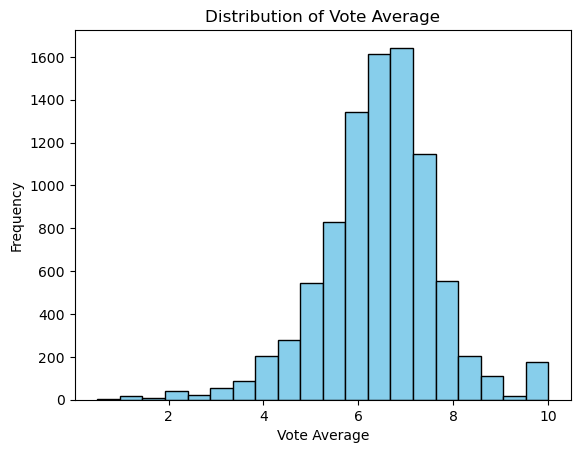

In [98]:
plt.hist(df['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Average')
plt.show()

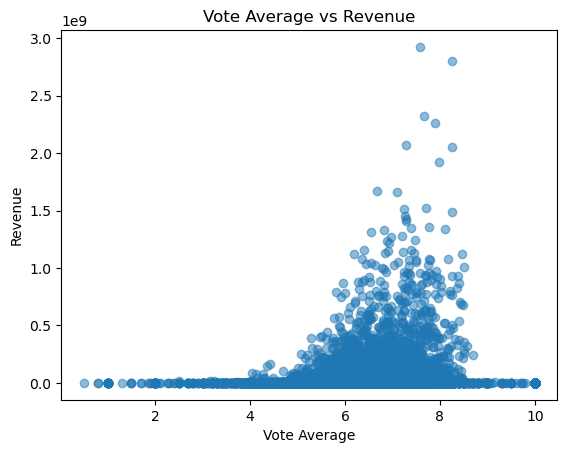

In [99]:
plt.scatter(df['vote_average'], df['revenue'], alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.title('Vote Average vs Revenue')
plt.show()

In [100]:
genres_count = Counter([genre for sublist in df['genres'] for genre in sublist.split(', ')])
genres_df = pd.DataFrame.from_dict(genres_count, orient='index', columns=['Count'])
genres_df.sort_values(by='Count', ascending=False, inplace=True)

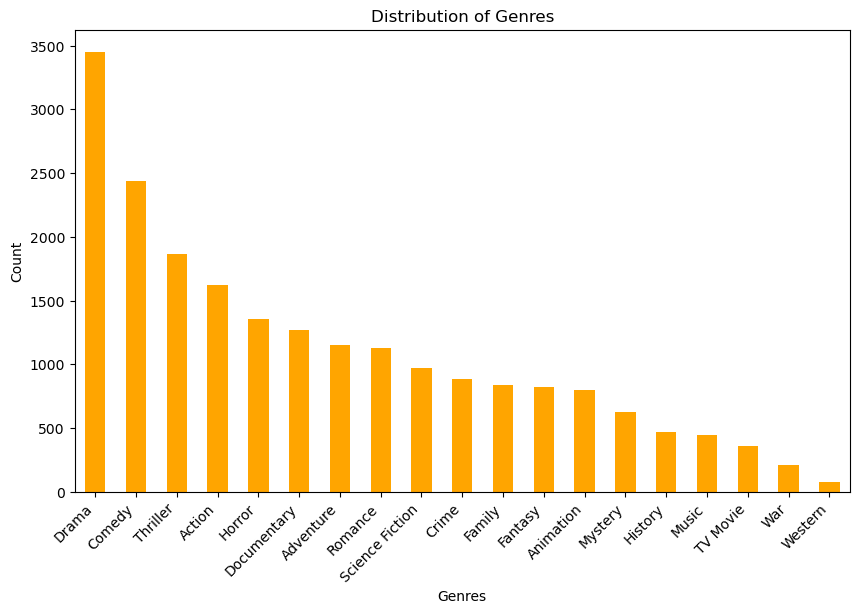

In [101]:
plt.figure(figsize=(10, 6))
genres_df['Count'].plot(kind='bar', color='orange')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    id  vote_average  vote_count   revenue   runtime  \
id            1.000000      0.120307   -0.231210 -0.183129 -0.198435   
vote_average  0.120307      1.000000    0.196360  0.131728  0.073828   
vote_count   -0.231210      0.196360    1.000000  0.792291  0.285297   
revenue      -0.183129      0.131728    0.792291  1.000000  0.245385   
runtime      -0.198435      0.073828    0.285297  0.245385  1.000000   
adult         0.005756      0.033821   -0.019281 -0.014516  0.004930   
budget       -0.209191      0.090883    0.681291  0.784271  0.285677   
popularity    0.030348      0.081031    0.185398  0.231413  0.119583   

                 adult    budget  popularity  
id            0.005756 -0.209191    0.030348  
vote_average  0.033821  0.090883    0.081031  
vote_count   -0.019281  0.681291    0.185398  
revenue      -0.014516  0.784271    0.231413  
runtime       0.004930  0.285677    0.119583  
adult         1.000000 -0.019057   -0.010095  
b

C:\Users\brand\AppData\Local\Temp\ipykernel_3676\1520333006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


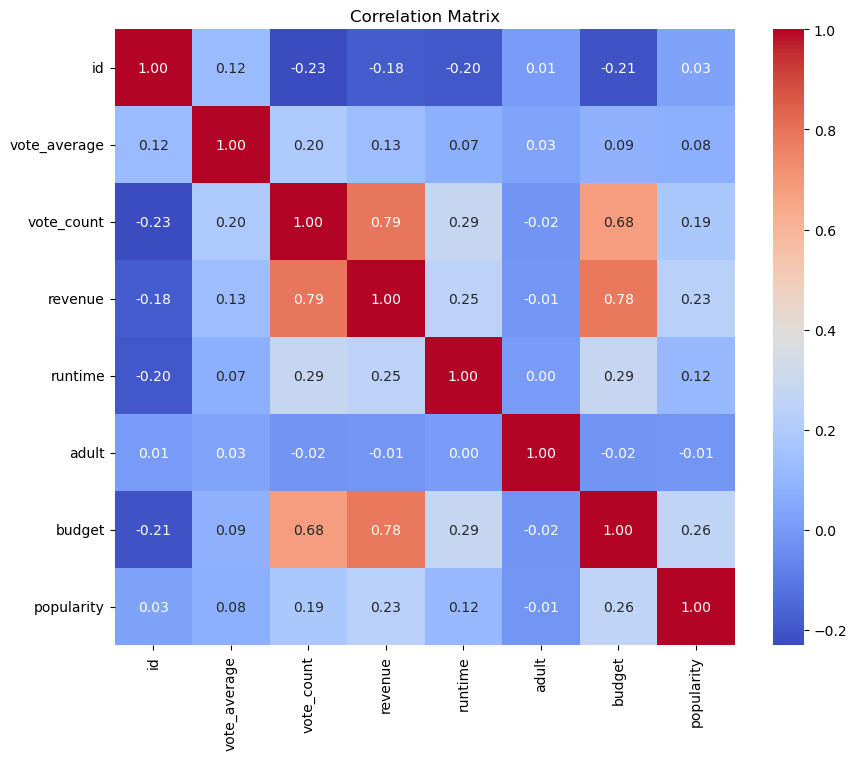

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Recommendation Model Building - Suprise recommender system

In [82]:
reader = Reader(rating_scale=(0, 10))

In [84]:
data = Dataset.load_from_df(df[['id', 'title', 'vote_average']], reader)

In [85]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [86]:
algo = SVD()
algo.fit(trainset)

In [87]:
predictions = algo.test(testset)

In [88]:
#Evaluating Model

In [89]:
rmse_score = rmse(predictions)
print("RMSE:", rmse_score)

RMSE: 1.2161
RMSE: 1.216138028893218


In [ ]:
#Testing recommendations

In [93]:
user_id = 123  # Example user ID
movies_not_watched = df['title'].unique()  # List of all movie IDs
movies_watched_by_user = df[df['id'] == user_id]['title'].unique()

In [94]:
#getting rid of movies already watched
movies_to_predict = [title for title in movies_not_watched if title not in movies_watched_by_user]

In [95]:
#predicting ratings
user_recommendations = [(title, algo.predict(id, title).est) for title in movies_to_predict]

In [96]:
#getting top recomendations
top_recommendations = sorted(user_recommendations, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Recommendations for User", id, ":", top_recommendations)

Top 10 Recommendations for User <built-in function id> : [('Torn', 6.769040034274703), ("Per l'amor di Dio", 6.753423012446384), ('The KFC', 6.7509913595113105), ('Langhe Doc', 6.749411612425799), ("Mother's Day Gift", 6.747308477215668), ('Strange Factories', 6.743822035538084), ('The Edge Of Human', 6.743616101365447), ('BLUE', 6.7435683505930575), ('They Wore The Red Suit', 6.743212318857572), ('Paper Champions', 6.742984378896775)]
